# Single feature analysis

## 1. Libraries import

In [30]:
PATH = "/Users/arnaudalepee/repos/ds_ci_cd/"
import sys
sys.path.append(PATH+"Tools_pandas/")

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
import json
from DataInit import DataInit
from DataTransformation import DataTransformation
from Model import Model

## 2. Data Initialization

In [32]:
init = DataInit("/Users/arnaudalepee/repos/ds_ci_cd/data/titanic.csv","\t","Survived",0.7)
init.run()

TypeError: object of type 'float' has no len()

In [33]:
analysis_df = init.df

AttributeError: 'DataInit' object has no attribute 'df'

In [34]:
analysis_df.head()

NameError: name 'analysis_df' is not defined

## 3. Single feature analyis

### Missing values?

In [35]:
for f in analysis_df:
    missing = "{} has {} values missing".format(f, analysis_df[f].isna().sum())
    print(missing)

NameError: name 'analysis_df' is not defined

#### Age

In [36]:
plt.hist(analysis_df['Age'])
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('# of passengers')

NameError: name 'analysis_df' is not defined

In [37]:
age_median = analysis_df['Age'].median()

NameError: name 'analysis_df' is not defined

In [7]:
analysis_df['Age'] = analysis_df['Age'].fillna(analysis_df['Age'].median())

NameError: name 'analysis_df' is not defined

In [8]:
plt.hist(analysis_df['Age'])
plt.title('Age distribution after replacing missing values')
plt.xlabel('Age')
plt.ylabel('# of passengers')

NameError: name 'analysis_df' is not defined

### Survival Rate

AGE

In [9]:
def compute_survival_rate(data, feature, output_flag):
    if '{}_SR'.format(feature) in data.columns:
        data = data.drop(['{}_SR'.format(feature)], axis=1)

    # Get the mean of default (i.e Survival rate) for each distinct value
    grouping = data[[feature, output_flag]].groupby([feature], as_index=False)[output_flag].mean()
    grouping.columns = [feature, '{}_SR'.format(feature)]

    # Merge it to the main self._dataframe
    data = pd.merge(data, grouping, how='left', on=feature)

    return data

In [10]:
analysis_df = compute_survival_rate(analysis_df,'Age','Survived')
analysis_df = analysis_df.sort_values(by=['Age'])

NameError: name 'analysis_df' is not defined

In [11]:
plt.hist(analysis_df['Age'])

NameError: name 'analysis_df' is not defined

In [12]:
plt.plot(analysis_df['Age'],analysis_df['Age_SR'])

NameError: name 'analysis_df' is not defined

In [13]:
analysis_df['Age_disc'], age_bins = pd.qcut(analysis_df['Age'],q=4,labels=False, retbins=True)

NameError: name 'analysis_df' is not defined

In [14]:
analysis_df = compute_survival_rate(analysis_df,'Age_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Age_disc'])

NameError: name 'analysis_df' is not defined

In [15]:
plt.plot(analysis_df['Age_disc'],analysis_df['Age_disc_SR'])
plt.title('Relationship between Survival Rate & Discretized Age')
plt.ylabel('Survival rate')
plt.xlabel('Age bin ref')

NameError: name 'analysis_df' is not defined

In [16]:
age_bins

NameError: name 'age_bins' is not defined

SEX

In [17]:
analysis_df = compute_survival_rate(analysis_df,'Sex','Survived')
analysis_df = analysis_df.sort_values(by=['Sex'])

NameError: name 'analysis_df' is not defined

In [18]:
plt.hist(analysis_df['Sex'])

NameError: name 'analysis_df' is not defined

In [19]:
plt.plot(analysis_df['Sex'],analysis_df['Sex_SR'])

NameError: name 'analysis_df' is not defined

FARE

In [20]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

NameError: name 'analysis_df' is not defined

In [21]:
plt.hist(analysis_df['Fare'])

NameError: name 'analysis_df' is not defined

In [22]:
analysis_df['Fare'] = winsorize(analysis_df['Fare'],limits=0.03)

NameError: name 'analysis_df' is not defined

In [23]:
plt.hist(analysis_df['Fare'])

NameError: name 'analysis_df' is not defined

In [24]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

NameError: name 'analysis_df' is not defined

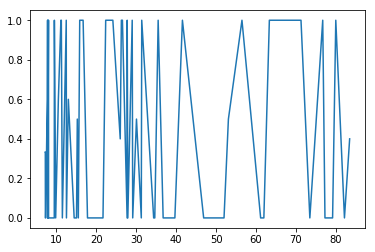

In [26]:
plt.plot(analysis_df['Fare'],analysis_df['Fare_SR'])

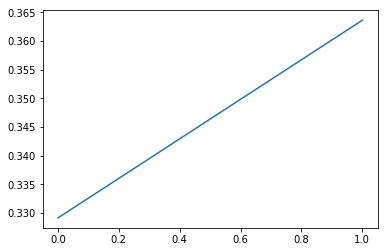

In [46]:
analysis_df['Fare_disc'], fare_bins = pd.qcut(analysis_df['Fare'],q=2,labels=False, retbins=True)
analysis_df = compute_survival_rate(analysis_df,'Fare_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Fare_disc'])
plt.plot(analysis_df['Fare_disc'],analysis_df['Fare_disc_SR'])

In [47]:
fare_bins

array([  6.75  ,  14.4542, 263.    ])

### Analysis conclusion

- Age: replace missing values + discretization
- Sex: no transformation required
- Fare: winsorize + discretize

In [29]:
pipeline_instructions ={
    "Age" : {
        "replace_missings" : {"apply":True, "value": age_median},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": False, "value": list(age_bins)}
    },
    "Sex" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": False, "value": None}},
    "Fare" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": True, "value": 0.03},
        "discretize" : {"apply": True, "value": list(fare_bins)}}
}

In [30]:
with open('Config/pipeline_instructions.json', 'w') as fp:
    json.dump(pipeline_instructions, fp)

## 4. Data transformation

In [31]:
trans = DataTransformation(init)
trans.run()

## 5. Model

In [32]:
model = Model(trans)
model.run()

[[61 10]
 [16 23]]
